## Blinded data tests

In [1]:
import os
import sys
sys.path.append('/global/cfs/cdirs/desicollab/users/epaillas/code/desiblind')
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import lsstypes as types

from desiblind import TracerPowerSpectrumMultipolesBlinder

In [10]:
def get_namespace(tracer, zrange):
    return {
        ('BGS_BRIGHT-21.35', (0.1, 0.4)): 'BGS_z0',
        ('LRG', (0.4, 0.6)): 'LRG_z0',
        ('LRG', (0.6, 0.8)): 'LRG_z1',
        ('LRG', (0.8, 1.1)): 'LRG_z2',
        ('ELG_LOPnotqso', (0.8, 1.1)): 'ELG_z0',
        ('ELG_LOPnotqso', (1.1, 1.6)): 'ELG_z1',
        ('QSO', (0.8, 2.1)): 'QSO_z0',
    }[(tracer, zrange)]

def get_blinded(spectrum, tracer='LRG', zrange=(0.4 , 0.6)):
    from desiblind import TracerPowerSpectrumMultipolesBlinder
    blinded_label = get_namespace(tracer, zrange)
    blinded_spectrum = TracerPowerSpectrumMultipolesBlinder.apply_blinding(
        name=blinded_label,
        data=spectrum,
    )
    return blinded_spectrum

def get_measurement_fn(kind='mesh2_spectrum_poles', version='dr2-v2', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, nran = 18, weight_type='default', **kwargs):
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    # base_dir = base_dir / (f'blinded_{recon}' if recon else 'blinded')
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/{version}/data_splits')
    base_dir = Path(f'/pscratch/sd/s/shengyu/Y3/blinded/dr2-v2/data_splits')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}_nran{nran}.h5')


In [14]:
default_bins = {
    'BGS': [(0.1, 0.4)],
    'LRG': [(0.4, 0.6), (0.6, 0.8), (0.8, 1.1)],
    'ELG_LOPnotqso': [(0.8, 1.1), (1.1, 1.6)],
    'QSO': [(0.8, 2.1)],
}

for tracer, zranges in default_bins.items():
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35' 
    for zr in zranges:
        for region in ['NGC', 'SGC', 'GCcomb']:
            data_fn = get_measurement_fn(kind = 'mesh2_spectrum_poles', tracer=tracer, region=region, zrange=zr, weight_type = 'default_fkp')
            if os.path.exists(data_fn):
                spectrum = types.read(data_fn)
                blinded_fn = get_measurement_fn(kind = 'blinded_mesh2_spectrum_poles', tracer=tracer, region=region, zrange=zr, weight_type = 'default_fkp')
                blinded_label = get_namespace(tracer, zr)
                blinded_spectrum = get_blinded(spectrum, tracer = tracer, zrange=zr)
                blinded_spectrum.write(blinded_fn)
                # os.remove(data_fn)

In [12]:
fn = '/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.6-0.8_NGC_default_nran18.h5'
spectrum = types.read(fn)
spectrum

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.6-0.8_NGC_default_nran18.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
blinded_data = TracerPowerSpectrumMultipolesBlinder.apply_blinding(
    name=name,
    data=observable,
)

NameError: name 'observable' is not defined

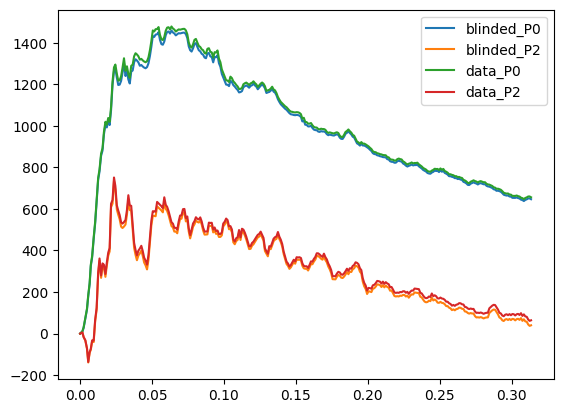

In [ ]:

if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35' 
region = 'GCcomb'
zr = (0.1, 0.4)

fig, ax = plt.subplots()
data = types.read(get_measurement_fn(kind = 'mesh2_spectrum_poles', tracer=tracer, region=region, zrange=zr, weight_type = 'default_fkp'))
poles = [data.get(ell) for ell in [0,2]]
k = poles[0].coords('k')
poles = [pole.value() for pole in poles]
ax.plot(k, k * poles[0], label='blinded_P0')
ax.plot(k, k * poles[1], label='blinded_P2')

data = types.read(get_measurement_fn(kind = 'blinded_mesh2_spectrum_poles', tracer=tracer, region=region, zrange=zr, weight_type = 'default_fkp'))
poles = [data.get(ell) for ell in [0,2]]
k = poles[0].coords('k')
poles = [pole.value() for pole in poles]
ax.plot(k, k * poles[0], label='data_P0')
ax.plot(k, k * poles[1], label='data_P2')
ax.legend()

In [64]:
data

Mesh2SpectrumPoles(labels=[{'ells': 0}], size=314)